# 1. Data to Insights


### 1.1 Business Understanding

The business problem under study here is why the best employees of this company are 
leaving pre-maturely. The company also wants us to predict which employees will be 
leaving next. 

### 1.2 Analytic Solution

We have two main goals:

* We want to understand why the good employees leave
* Predict who will leave next

We propose working with the HR department to gather significant data that can 
probably explain the cause and effect relationship under question.

### 1.3 Feasability Study

Managers in the HR department have not kept an organised report on why employees 
have left but from the data we can determine this through sound data science 
techniques. 

From the data given we have the following information: For our 15000 employees: 
satisfaction level, latest evaluation (yearly), number of project worked on, 
average monthly hours, time spend in the company (in years), 
work accident (within the past 2 years), promotion within the past 5 years, 
department and salary.

### 1.4 Analytical Base Table

This is the data provided by the HR department:

In [360]:
import numpy as np
import pandas as pd
df = pd.read_csv("HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Data Exploration

Here our aim is to asses the quality of our data, rectify and clean the data where
it might suffer and run visualizations to help us understand our data graphically.

### 2.1 Data Quality Report

In [361]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


This table describe the characteristics of each features of our analytical base table. 
We can see different statistical measures of central tendency and variation. For 
example we can see that our attrition rate is equal to 24%, the satisfaction level 
is around 62% and the performance average is around 71%. We see that on average 
people work on 3 to 4 projects a year and about 200 hours per months.

## 2.2 Data Cleaning

The data had a couple of incorrectly named column names.

In [362]:
# rename `Work_accident` to `work_accident`
df['work_accident'] = df['Work_accident']
df = df.drop('Work_accident', 1)

# rename `average_montly_hours` to `average_monthly_hours`
df['average_monthly_hours'] = df['average_montly_hours']
df = df.drop('average_montly_hours', 1)

The data did not have any NULL values

In [363]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
time_spend_company       0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
work_accident            0
average_monthly_hours    0
dtype: int64

The categorical variables were 'int64' type

In [364]:
# Convert required columns to categorical
df['salary'] = df['salary'].astype('category')
df['left'] = df['left'].astype('category')
df['department'] = df['sales'].astype('category')
df = df.drop('sales', 1)
df['promotion_last_5years'] = df['promotion_last_5years'].astype('category')
df['work_accident'] = df['work_accident'].astype('category')

There were duplicate rows of data

In [365]:
df = df.drop_duplicates()

In [366]:
df.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,left,promotion_last_5years,salary,work_accident,average_monthly_hours,department
0,0.38,0.53,2,3,1,0,low,0,157,sales
1,0.80,0.86,5,6,1,0,medium,0,262,sales
2,0.11,0.88,7,4,1,0,medium,0,272,sales
3,0.72,0.87,5,5,1,0,low,0,223,sales
4,0.37,0.52,2,3,1,0,low,0,159,sales


# Data Visualization

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

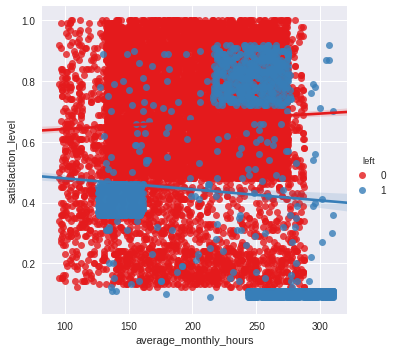

In [368]:
sns.lmplot(x='average_monthly_hours', y='satisfaction_level',
           data=df, hue='left', palette='Set1')

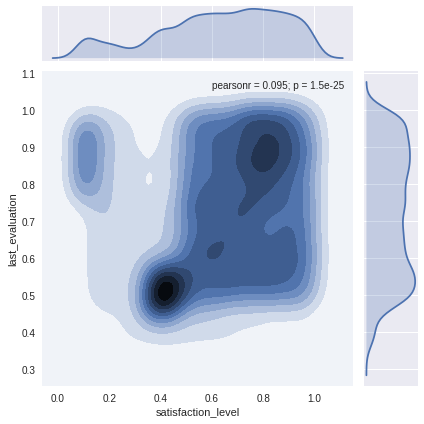

In [369]:
sns.jointplot(x="satisfaction_level", y="last_evaluation", data=df, kind='kde')

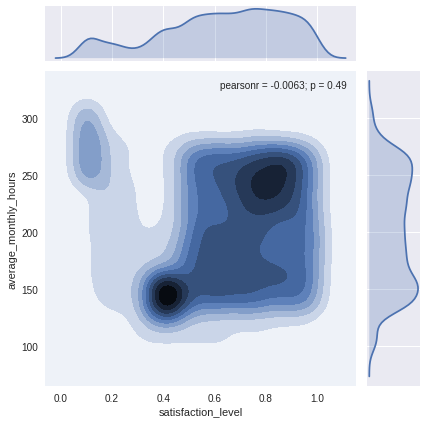

In [370]:
sns.jointplot(x="satisfaction_level",
              y="average_monthly_hours", data=df, kind='kde')

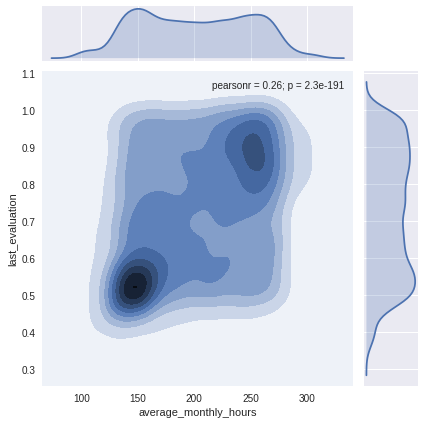

In [371]:
sns.jointplot(x="average_monthly_hours",
              y="last_evaluation", data=df, kind='kde')

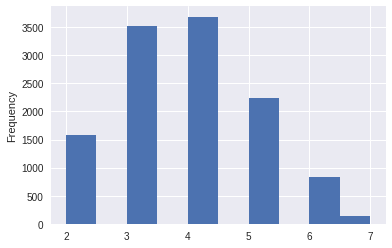

In [372]:
df.number_project.plot('hist')

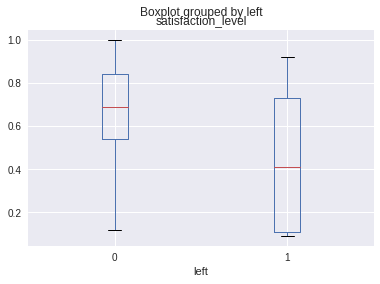

In [120]:
df.boxplot(column='satisfaction_level', by='left')

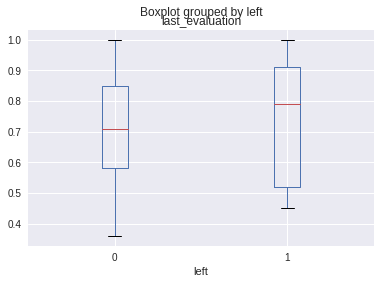

In [121]:
df.boxplot(column='last_evaluation', by='left')

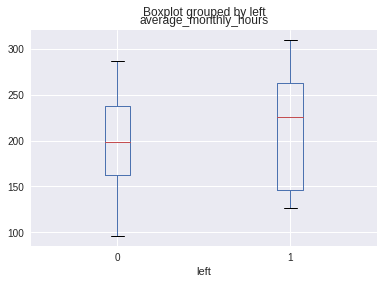

In [122]:
df.boxplot(column='average_monthly_hours', by='left')

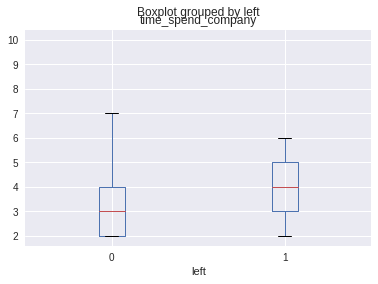

In [123]:
df.boxplot(column='time_spend_company', by='left')

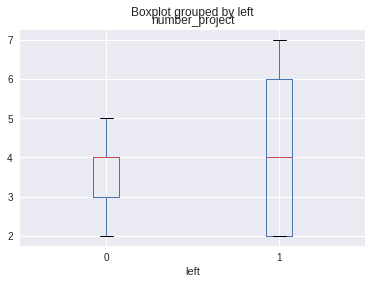

In [124]:
df.boxplot(column='number_project', by='left')

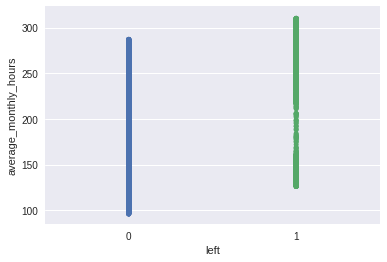

In [125]:
sns.stripplot(x='left', y='average_monthly_hours', data=df)

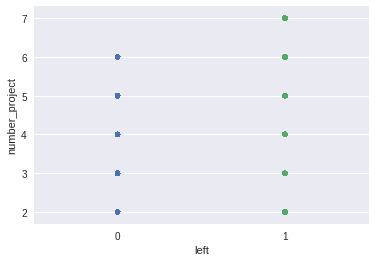

In [126]:
sns.stripplot(x='left', y='number_project', data=df)

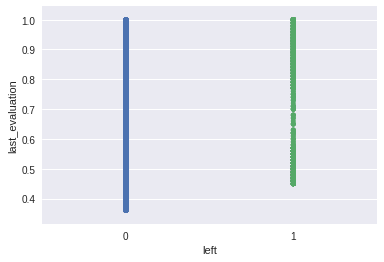

In [127]:
sns.stripplot(x='left', y='last_evaluation', data=df)

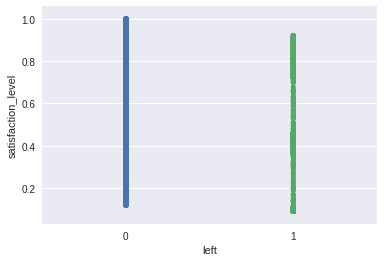

In [128]:
sns.stripplot(x='left', y='satisfaction_level', data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f60466731d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f60465bdd68>], dtype=object)

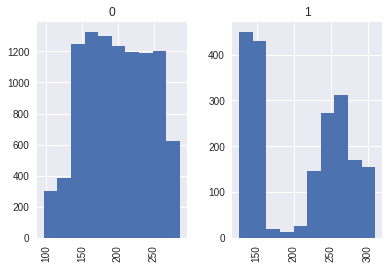

In [129]:
df['average_monthly_hours'].hist(by=df['left'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f60465cf710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6046431c50>], dtype=object)

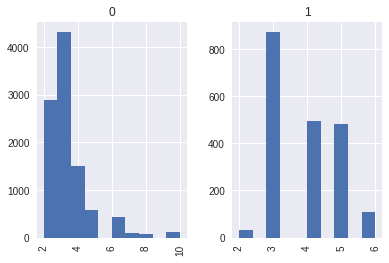

In [130]:
df['time_spend_company'].hist(by=df['left'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6046661a58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f60462b1cf8>], dtype=object)

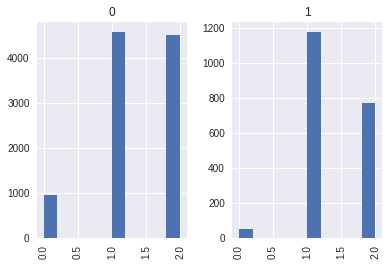

In [131]:
df['salary'].cat.codes.hist(by=df['left'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f60462a65f8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f604612fac8>], dtype=object)

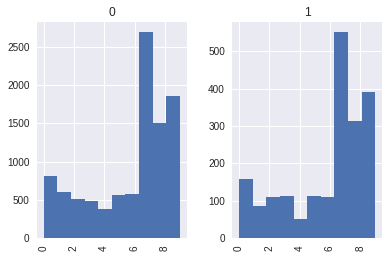

In [132]:
df['department'].cat.codes.hist(by=df['left'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f604612afd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6045fad4e0>], dtype=object)

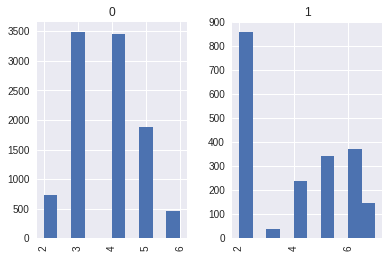

In [133]:
df['number_project'].hist(by=df['left'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6045f29630>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6045e33b00>], dtype=object)

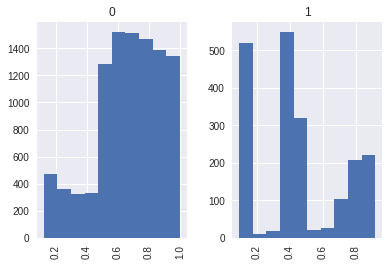

In [134]:
df['satisfaction_level'].hist(by=df['left'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6045dc1f98>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6045cb92b0>], dtype=object)

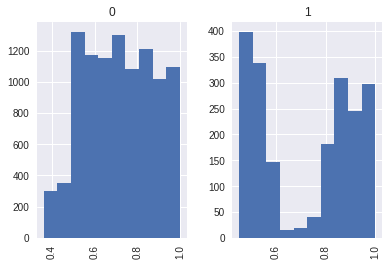

In [135]:
df['last_evaluation'].hist(by=df['left'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6045c3b710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6045b35a90>], dtype=object)

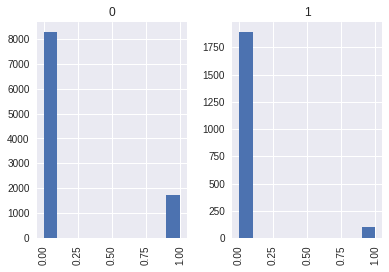

In [136]:
df['work_accident'].hist(by=df['left'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6045adc6a0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f6045a13208>], dtype=object)

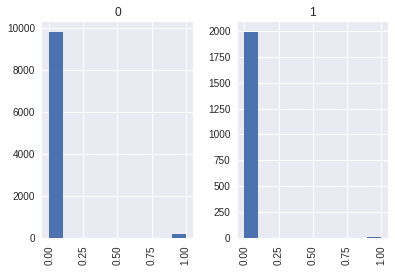

In [137]:
df['promotion_last_5years'].hist(by=df['left'])

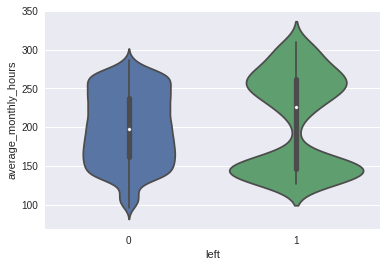

In [138]:
sns.violinplot(x='left', y='average_monthly_hours', data=df)

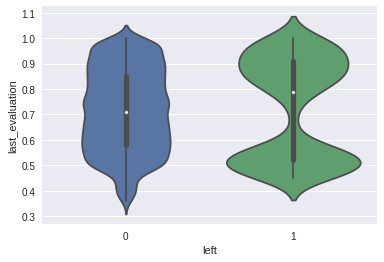

In [139]:
sns.violinplot(x='left', y='last_evaluation', data=df)

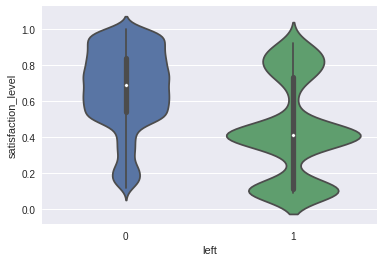

In [140]:
sns.violinplot(x='left', y='satisfaction_level', data=df)

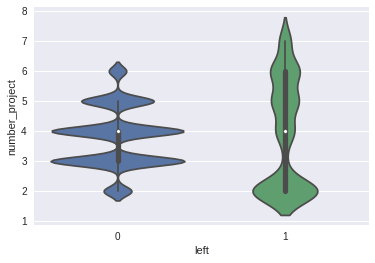

In [141]:
sns.violinplot(x='left', y='number_project', data=df)

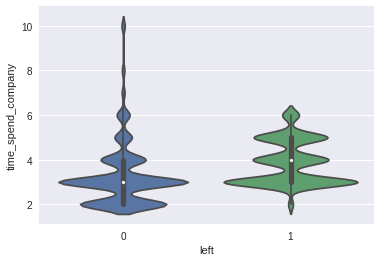

In [142]:
sns.violinplot(x='left', y='time_spend_company', data=df)

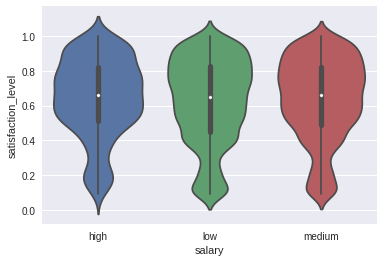

In [143]:
sns.violinplot(x='salary', y='satisfaction_level', data=df)

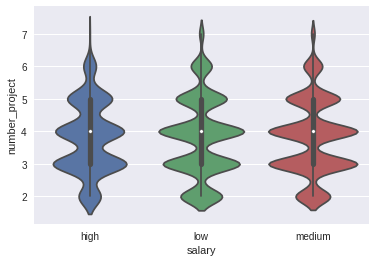

In [144]:
sns.violinplot(x='salary', y='number_project', data=df)

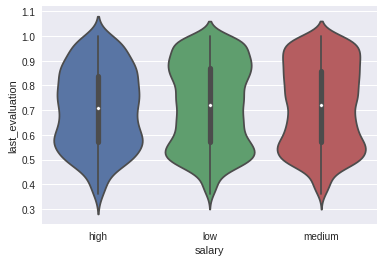

In [145]:
sns.violinplot(x='salary', y='last_evaluation', data=df)

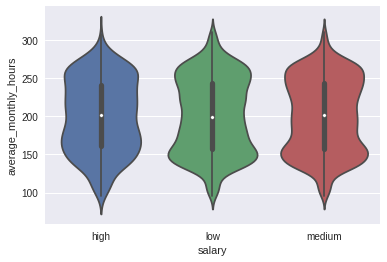

In [146]:
sns.violinplot(x='salary', y='average_monthly_hours', data=df)

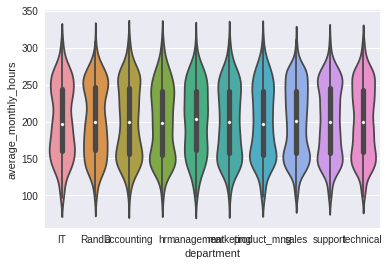

In [147]:
sns.violinplot(x='department', y='average_monthly_hours', data=df)

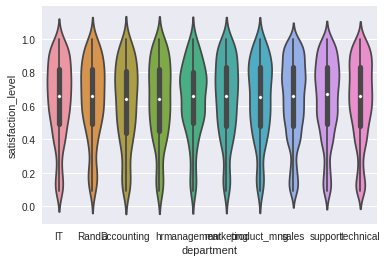

In [148]:
sns.violinplot(x='department', y='satisfaction_level', data=df)

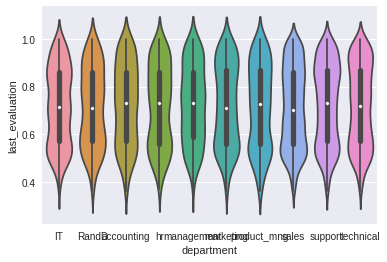

In [149]:
sns.violinplot(x='department', y='last_evaluation', data=df)

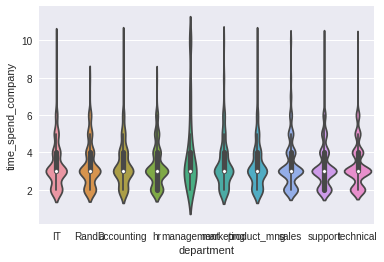

In [150]:
sns.violinplot(x='department', y='time_spend_company', data=df)

In [151]:
import numpy as np
percentiles = np.array([25, 50, 75])

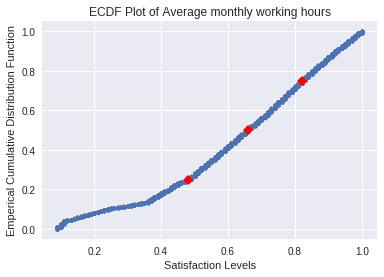

In [152]:
ptiles = np.percentile(df['satisfaction_level'], percentiles)
x = np.sort(df['satisfaction_level'])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(ptiles, percentiles / 100, marker='D',
             color='red', linestyle='none')
plt.xlabel("Satisfaction Levels")
plt.ylabel("Emperical Cumulative Distribution Function")
plt.title("ECDF Plot of Average monthly working hours")

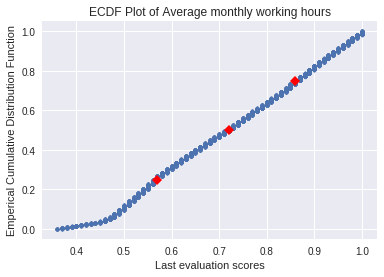

In [153]:
ptiles = np.percentile(df['last_evaluation'], percentiles)
x = np.sort(df['last_evaluation'])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(ptiles, percentiles / 100, marker='D',
             color='red', linestyle='none')
plt.xlabel("Last evaluation scores")
plt.ylabel("Emperical Cumulative Distribution Function")
plt.title("ECDF Plot of Average monthly working hours")

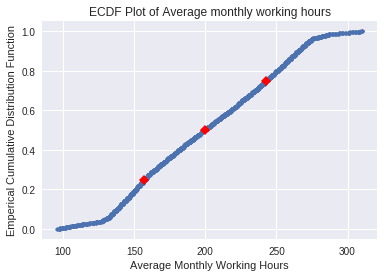

In [154]:
ptiles = np.percentile(df['average_monthly_hours'], percentiles)
x = np.sort(df['average_monthly_hours'])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(ptiles, percentiles / 100, marker='D',
             color='red', linestyle='none')
plt.xlabel("Average Monthly Working Hours")
plt.ylabel("Emperical Cumulative Distribution Function")
plt.title("ECDF Plot of Average monthly working hours")

# Machine Learning

Three algorithms are compared here:
* K Nearest Neighbour Classification
* Logistic Regression
* Decision Trees

Each model is trained and tested with the same train-test split of the original dataframe.

The ROC Curve is plotted and the AUC is calculated for each algorithm.

In [373]:
from sklearn.model_selection import train_test_split

In [374]:
X = pd.get_dummies(df.drop('left', axis=1)).values
y = df['left'].cat.codes.values

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [376]:
from sklearn.metrics import roc_curve

In [377]:
from sklearn.metrics import roc_auc_score

## K Nearest Neighbour

We are trying to predict whether an employee will leave by
* Looking at the `k` closest labelled data points
* See what the labels of these data points are
* And labelling the data point in question with the label of the majority of these data points

In [378]:
from sklearn.neighbors import KNeighborsClassifier

In [379]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.95098534613441132

### Scaling
KNN Score post scaling the data

In [380]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [381]:
steps = [('scalar', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=8))]
pipeline = Pipeline(steps)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.94669024759979792

### ROC Curve

In [382]:
y_pred = knn.predict(X_test)
fpr, tpr, tresholds = roc_curve(y_test, y_pred)

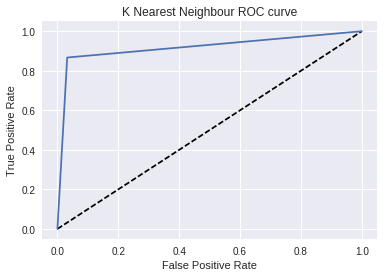

In [383]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='K Nearest Neighbour')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K Nearest Neighbour ROC curve')

### AUC Score

In [384]:
roc_auc_score(y_test, y_pred)

0.91745464611503835

## Logistic Regression

In [385]:
from sklearn.linear_model import LogisticRegression

In [386]:
logreg = LogisticRegression()

In [387]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [388]:
logreg.score(X_test, y_test)

0.8302172814552804

### ROC Curve

In [389]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)

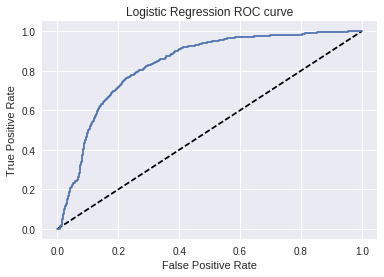

In [390]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')

### AUC score

In [391]:
roc_auc_score(y_test, y_pred_prob)

0.83168740650573425

## Decision Tree Model

In [392]:
from sklearn.tree import DecisionTreeClassifier

In [393]:
tree = DecisionTreeClassifier()

In [394]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### ROC Curve

In [395]:
y_pred_prob = tree.predict_proba(X_test)[:,1]
fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)

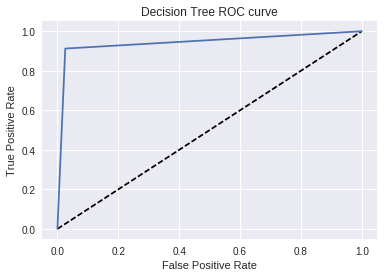

In [396]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC curve')

### AUC Score

In [397]:
roc_auc_score(y_test, y_pred_prob)

0.94329893599859205

## Feature Selection

We are using `lasso` regression for feature selection. This shrinks the coefficients of less important features to exactly 0.

In [398]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

([<matplotlib.axis.XTick at 0x7f6041562390>,
 <a list of 9 Text xticklabel objects>)

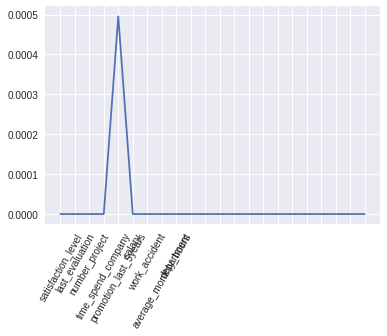

In [399]:
plt.plot(range(X.shape[1]), lasso_coef)
plt.xticks(range(X.shape[1]), df.drop('left', axis=1).columns, rotation=60)

In [400]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
model.feature_importances_

array([ 0.19510017,  0.14927596,  0.25045459,  0.17468716,  0.15925797,
        0.00096206,  0.00164658,  0.0056139 ,  0.00860615,  0.00446798,
        0.0067058 ,  0.01032424,  0.00331997,  0.00286671,  0.00307173,
        0.00297081,  0.00172724,  0.00233805,  0.00285771,  0.00491175,
        0.00465128,  0.00418218])